In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


# Game Data Sales Analysis

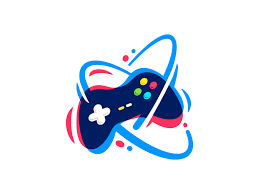]

#### Questions
1. How many Games , Platforms and Genres in the data ?
2. Visualize the given data
    *   National Sales by Years
    *   Europian Sales by Years
    *   Asian Sales by Years
    *   Local Sales by Years
    *   Global Sales by Years 
    *   Over-All Sales by Years  
3. Show top 3 games and visualize the Global Sales 
4. How many games release in last year ? and visualize
5. * In which year, a most game released and How many games released ? Also visualize the sales
   * How many games is Re-released
6. Visualize the sales from UBISOFT (publisher)
7. Which year can released maximum number of games by UBISOFT (publisher) and visualize the sales 
8. Which game are only in Racing(genre) and Wii(platform)
9. How many games released by SONY publisher and visualize the global sales by years also differentiate with platforms
10. Show that the which game is globally sales above 30% 


##  **Import Needed Libraries And Data**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data and Get Some Information

In [137]:
# Load data
data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Structure of DataFrame

In [138]:
# Top 5 data
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [139]:
# Shape of the DataFrame
data.shape

(16598, 11)

In [140]:
# Identify the missing values or Nun Values
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [141]:
# Renamed the columns 
data.rename(columns ={'JP_Sales' : 'As_Sales' , 'Other_Sales' : 'L_Sales'  },inplace=True)

In [142]:
# Drop all the Nun values
data.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [143]:
# Drop the unwanted data
data.drop(data[data.Global_Sales < 0.20].index, inplace = True)
data.drop(data[data.As_Sales < 0.05].index, inplace = True)
data.drop(data[data.L_Sales < 0.02].index, inplace = True)

In [144]:
# Quich cech info of numerical values
data.describe()

,Rank,Year,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
count,1509.000000,1501.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,2301.219351,2004.980680,1.075070,0.685805,0.492710,0.224844,2.478171
std,2010.490001,7.066845,2.293909,1.408405,0.802441,0.541533,4.350769
min,1.000000,1983.000000,0.000000,0.000000,0.050000,0.020000,0.200000
25%,553.000000,2000.000000,0.150000,0.070000,0.110000,0.030000,0.540000
50%,1697.000000,2006.000000,0.410000,0.230000,0.230000,0.070000,1.190000
75%,3707.000000,2011.000000,1.110000,0.710000,0.510000,0.210000,2.700000
max,7733.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [145]:
# Information about the what kind of data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 7731
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1509 non-null   int64  
 1   Name          1509 non-null   object 
 2   Platform      1509 non-null   object 
 3   Year          1501 non-null   float64
 4   Genre         1509 non-null   object 
 5   Publisher     1509 non-null   object 
 6   NA_Sales      1509 non-null   float64
 7   EU_Sales      1509 non-null   float64
 8   As_Sales      1509 non-null   float64
 9   L_Sales       1509 non-null   float64
 10  Global_Sales  1509 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 141.5+ KB


In [146]:
# Finding the Duplicates
data.duplicated().any()

False

## 1. How many Games , Platforms and Genres in the data ?

In [147]:
Total_Games = data.Name.value_counts()

In [148]:
Total_Games

Name
Pro Evolution Soccer 2010         4
Pro Evolution Soccer 2008         4
PES 2009: Pro Evolution Soccer    4
Donkey Kong Country               3
Grand Theft Auto V                3
                                 ..
Kirby's Adventure                 1
Disney's Aladdin                  1
Pro Evolution Soccer              1
Kid Icarus                        1
Mana Khemia 2: Fall of Alchemy    1
Name: count, Length: 1380, dtype: int64

In [149]:
Total_Platform = data.Platform.value_counts()

In [150]:
Total_Platform

Platform
PS3     254
PS      233
PS2     189
DS      123
Wii      89
3DS      81
PS4      68
PSP      66
X360     59
N64      50
GBA      45
NES      45
GB       44
GC       44
PSV      36
WiiU     32
SNES     31
XB        7
GEN       5
DC        4
SAT       3
SCD       1
Name: count, dtype: int64

In [151]:
Total_Genre = data.Genre.value_counts()

In [152]:
Total_Genre

Genre
Role-Playing    314
Action          308
Sports          143
Platform        137
Fighting        125
Shooter         122
Racing           78
Misc             76
Simulation       76
Puzzle           54
Strategy         39
Adventure        37
Name: count, dtype: int64

In [153]:
Total_Publisher = data.Publisher.value_counts()

In [154]:
Total_Publisher

Publisher
Nintendo                        394
Sony Computer Entertainment     148
Capcom                          107
Namco Bandai Games              107
Konami Digital Entertainment    106
                               ... 
Tetris Online                     1
GungHo                            1
Compile                           1
Enterbrain                        1
Xing Entertainment                1
Name: count, Length: 86, dtype: int64

# Visualizations 
 
## 2. Visualize the given data
* ### National Sales by years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


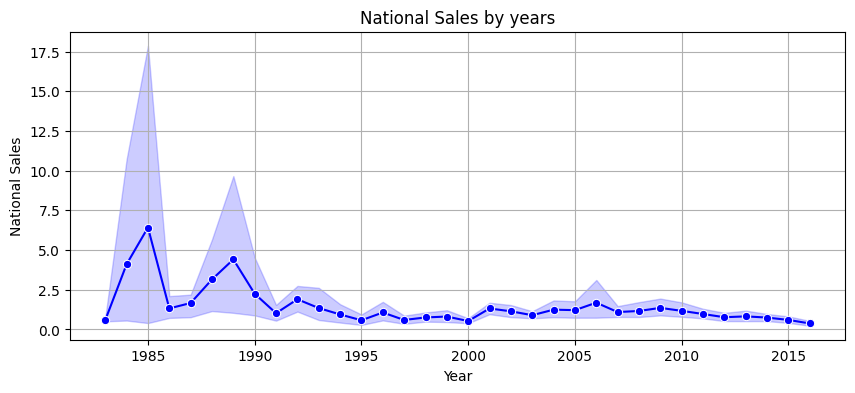

In [155]:
plt.figure(figsize=(10, 4))
sns.lineplot(data , x = "Year" , y = "NA_Sales" , color = 'b' , marker='o')
plt.title('National Sales by years')
plt.xlabel('Year')
plt.ylabel('National Sales')
plt.grid(True)
plt.show()


* ### Europian Sales by Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


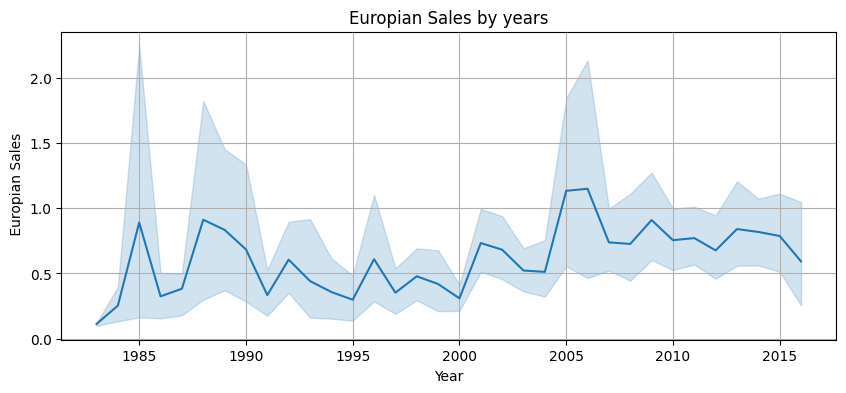

In [156]:

plt.figure(figsize=(10, 4))
sns.lineplot(data , x = "Year" , y = 'EU_Sales' )
plt.title('Europian Sales by years')
plt.xlabel('Year')
plt.ylabel(' Europian Sales')
plt.grid(True)
plt.show()

* ### Asian Sales by Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


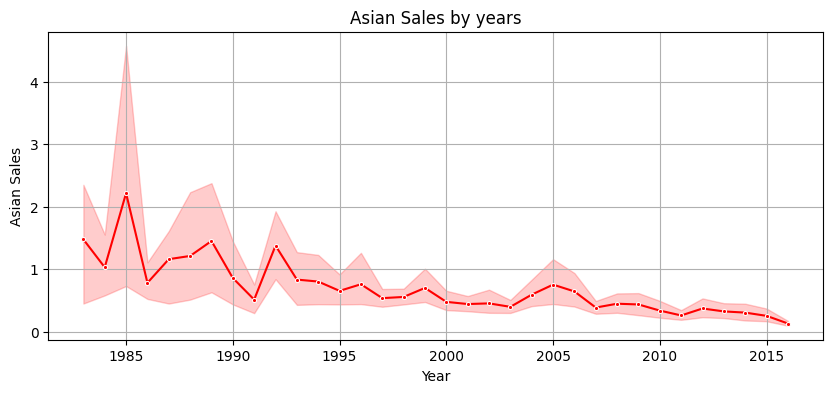

In [157]:
plt.figure(figsize=(10, 4))
sns.lineplot(data , x = "Year" , y = 'As_Sales' , color = 'r' , marker='.')
plt.title('Asian Sales by years')
plt.xlabel('Year')
plt.ylabel('Asian Sales')
plt.grid(True)
plt.show()

* ###  Local Sales by Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


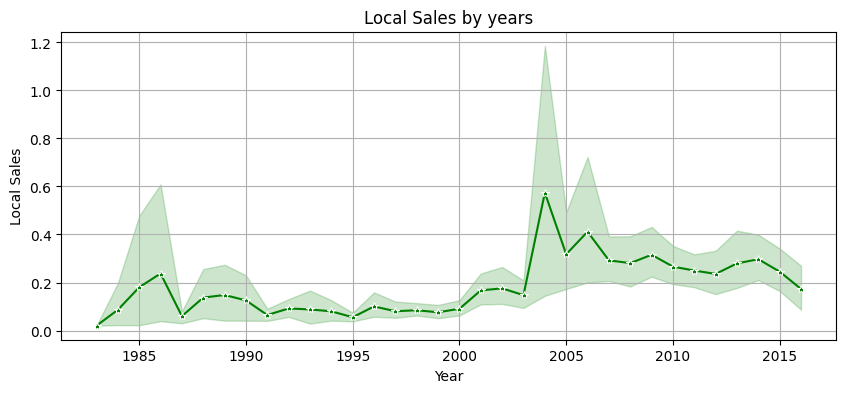

In [158]:
plt.figure(figsize=(10, 4))
sns.lineplot(data , x = "Year" , y = 'L_Sales' , color = 'g' , marker='*')
plt.title('Local Sales by years')
plt.xlabel('Year')
plt.ylabel('Local Sales')
plt.grid(True)
plt.show()

* ### Global Sales by Years 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


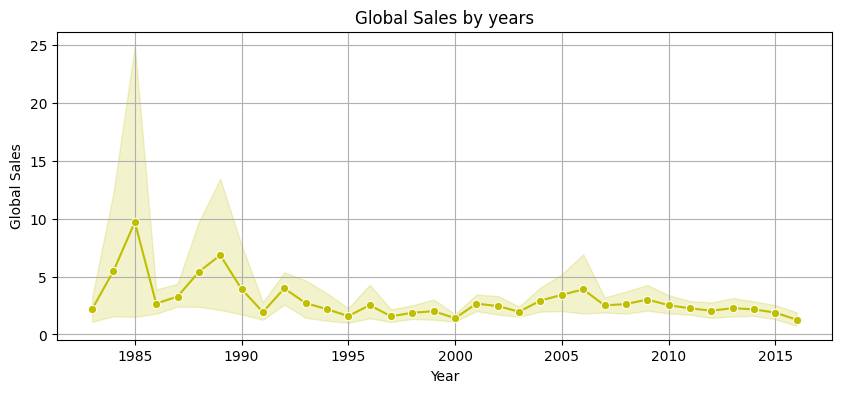

In [159]:
plt.figure(figsize=(10, 4))
sns.lineplot(data , x = "Year" , y = 'Global_Sales' , color = 'y' ,  marker='o')
plt.title('Global Sales by years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()

* ### Over-All Sales by Years

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

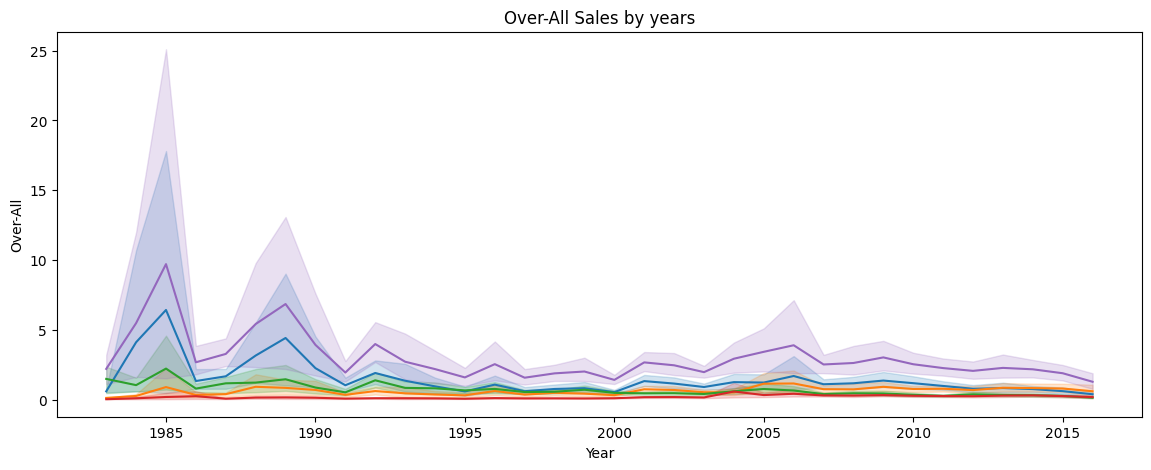

In [160]:
plt.figure(figsize=(14, 5))
sns.lineplot(data , x = "Year" , y = 'NA_Sales')
sns.lineplot(data , x = "Year" , y = 'EU_Sales')
sns.lineplot(data , x = "Year" , y = 'As_Sales')
sns.lineplot(data , x = "Year" , y = 'L_Sales')
sns.lineplot(data , x = "Year" , y = 'Global_Sales')
plt.title('Over-All Sales by years')
plt.xlabel('Year')
plt.ylabel('Over-All')
plt.show()

## 3. Show top 3 games and visualize the Global Sales 

In [161]:
#Top 3 Game 
d_1 = data.head(3)
d_1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


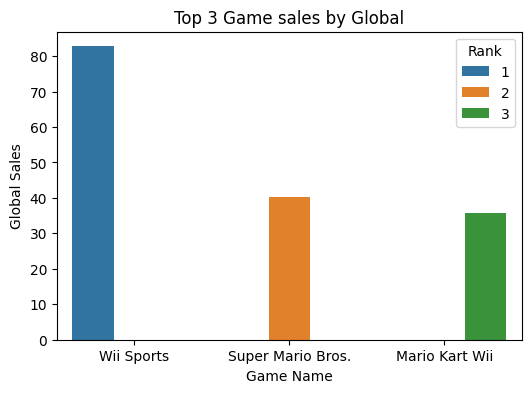

In [190]:
plt.figure(figsize=(6, 4))
sns.barplot(d_1 , x = "Name" , y = 'Global_Sales' , hue = 'Rank')
plt.title('Top 3 Game sales by Global')
plt.xlabel('Game Name') 
plt.ylabel('Global Sales')
plt.show()

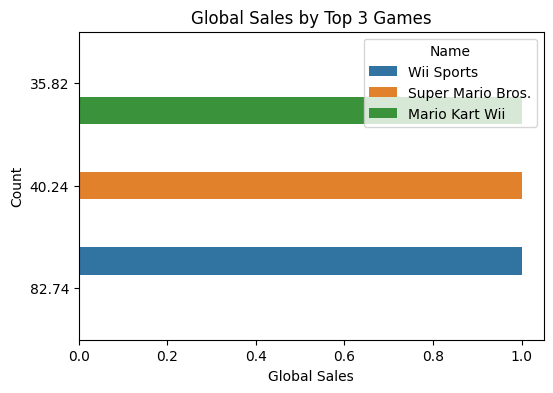

In [163]:

plt.figure(figsize=(6, 4))
sns.countplot(d_1 , y = "Global_Sales"  , hue = 'Name')
plt.title('Global Sales by Top 3 Games')
plt.xlabel('Global Sales') 
plt.ylabel('Count')
plt.show()

## 4. How many games release in last year ? and visualize

In [164]:
 data['Year'].sort_values(ascending=False)

221     2016.0
2242    2016.0
271     2016.0
1958    2016.0
5288    2016.0
         ...  
2786       NaN
5508       NaN
5618       NaN
5870       NaN
7615       NaN
Name: Year, Length: 1509, dtype: float64

In [217]:
L_Y = data.loc[221]
#There is only one game release in year-2020

In [166]:
L_Y

Rank                        222
Name                    FIFA 17
Platform                    PS4
Year                     2016.0
Genre                    Sports
Publisher       Electronic Arts
NA_Sales                   0.28
EU_Sales                   3.75
As_Sales                   0.06
L_Sales                    0.69
Global_Sales               4.77
Name: 221, dtype: object

In [167]:
L_Y1 = L_Y[['NA_Sales' , 'EU_Sales' , 'As_Sales' , 'L_Sales' , 'Global_Sales']]

([<matplotlib.patches.Wedge at 0x7b01aeab6410>,
 [Text(1.0953370077951952, 0.10117726698358998, 'Natoinal Sales'),
  Text(0.1828461041824277, 1.1859879013654857, 'Europian Sales'),
  Text(-0.9805175387921917, 0.49858334922147474, 'Asian Sales'),
  Text(-1.2676098799111029, 0.2883837588210535, 'Local Sales'),
  Text(0.0019736991329378705, -1.199998376878791, 'Global Sales')],
 [Text(0.59745654970647, 0.05518760017286725, '2.9%'),
  Text(0.10666022743974947, 0.6918262757965332, '39.3%'),
  Text(-0.5348277484321045, 0.2719545541208044, '0.6%'),
  Text(-0.7800676184068326, 0.17746692850526366, '7.2%'),
  Text(0.0011513244942137576, -0.6999990531792946, '49.9%')])

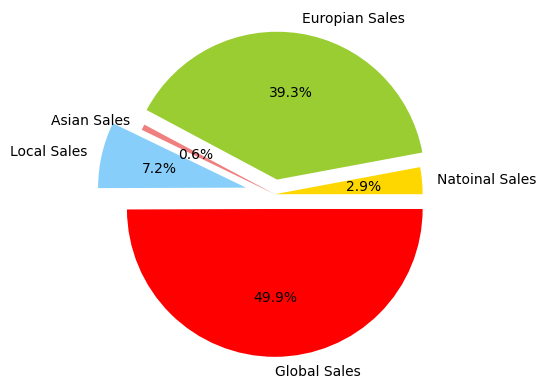

In [192]:
labels =  'Natoinal Sales' ,'Europian Sales', 'Asian Sales' , 'Local Sales', 'Global Sales'
colors = ['gold','yellowgreen','lightcoral','lightskyblue','red']
explode = (0,0.1,0,0.2,0.1)

plt.pie(L_Y1,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')

## 5. 1) In which year, a most game released and How many games released ? Also visualize the sales

In [169]:
data['Year'].value_counts()

Year
2011.0    93
2007.0    93
2009.0    91
2010.0    89
2008.0    79
2013.0    76
2012.0    75
2006.0    70
1997.0    66
2014.0    64
2015.0    62
1998.0    62
2001.0    61
2000.0    61
1999.0    59
2002.0    57
2003.0    53
2005.0    50
1996.0    47
2004.0    46
1995.0    21
2016.0    20
1994.0    16
1992.0    15
1991.0    11
1990.0    11
1989.0    10
1993.0     9
1984.0     8
1986.0     8
1988.0     7
1985.0     5
1987.0     3
1983.0     3
Name: count, dtype: int64

In [170]:
Most_Game_Released_Year = data[ data.Year == 2011.0 ]

In [194]:
Most_Game_Released_Year.value_counts().sum()

93

In [172]:
Most_Game_Released_Year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
42,43,Mario Kart 7,3DS,2011.0,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
53,54,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
75,76,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
...,...,...,...,...,...,...,...,...,...,...,...
6976,6978,Saint Seiya: Sanctuary Battle,PS3,2011.0,Action,Namco Bandai Games,0.00,0.09,0.11,0.03,0.23
7390,7392,Champion Jockey: G1 Jockey & Gallop Racer,PS3,2011.0,Sports,Tecmo Koei,0.06,0.05,0.08,0.02,0.21
7543,7545,Arcana Heart 3,PS3,2011.0,Fighting,PQube,0.04,0.05,0.10,0.02,0.20
7557,7559,Earth Defense Force: Insect Armageddon,PS3,2011.0,Shooter,D3Publisher,0.06,0.04,0.08,0.02,0.20


In [173]:
M_G = Most_Game_Released_Year[['NA_Sales' , 'EU_Sales' , 'As_Sales' , 'L_Sales' , 'Global_Sales']]

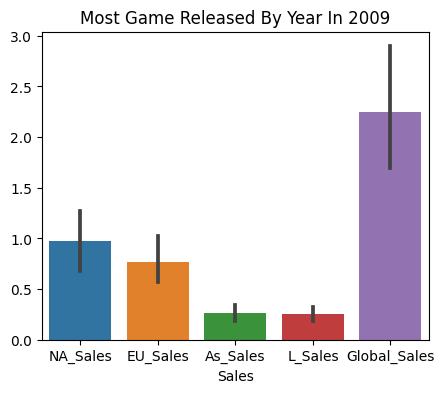

In [174]:
plt.figure(figsize=(5, 4))
sns.barplot(M_G)
plt.title('Most Game Released By Year In 2009')
plt.xlabel('Sales')
plt.show()

## 5. 2) How many games is Re-released

In [175]:
Most_Game_Released_Year.Name.value_counts()

Name
Call of Duty: Modern Warfare 3          2
The Elder Scrolls V: Skyrim             2
Battlefield 3                           2
Pro Evolution Soccer 2012               2
Saints Row: The Third                   2
                                       ..
Ni no Kuni: Wrath of the White Witch    1
Go Vacation                             1
Kirby's Return to Dreamland             1
Uncharted: Golden Abyss                 1
Ridge Racer                             1
Name: count, Length: 88, dtype: int64

## 6. Visualize the sales from UBISOFT (publisher)

In [176]:
P1 = data[ data.Publisher == 'Ubisoft']
dd = P1.groupby('Year')[['Global_Sales','NA_Sales','L_Sales']].mean()

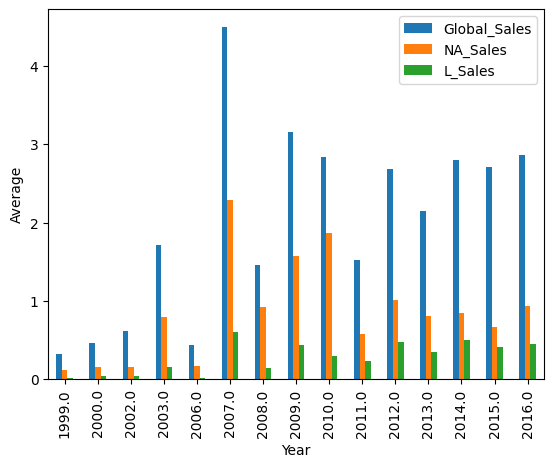

In [177]:
dd.plot(kind='bar' )
plt.xlabel('Year')
plt.ylabel('Average')
plt.show()

## 7. Which year can released maximum number of games by UBISOFT (publisher) and visualize the sales 

In [178]:
#How many games maximum released a publisher(Ubisoft) in year
Unisoft_Publisher = data[(data['Publisher'] == 'Ubisoft')]
Unisoft_Publisher.Year.value_counts()
# In the year 2014, Maximum game released a publisher(Ubisoft)

Year
2014.0    6
2012.0    5
2009.0    4
2011.0    4
2013.0    4
2000.0    4
2007.0    3
2008.0    3
2016.0    2
2015.0    2
2010.0    1
2003.0    1
2002.0    1
2006.0    1
1999.0    1
Name: count, dtype: int64

In [195]:
Unisoft_Publisher_Max = data[(data['Publisher'] == 'Ubisoft') & (data['Year'] == 2014.0 )]
Unisoft_Publisher_Max

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
280,281,Watch Dogs,PS4,2014.0,Action,Ubisoft,1.40,1.86,0.11,0.77,4.14
295,296,Far Cry 4,PS4,2014.0,Shooter,Ubisoft,1.12,2.12,0.10,0.69,4.03
304,305,Assassin's Creed: Unity,PS4,2014.0,Action,Ubisoft,1.18,1.96,0.08,0.70,3.92
891,893,Watch Dogs,PS3,2014.0,Action,Ubisoft,0.56,0.89,0.10,0.37,1.93
1337,1339,Far Cry 4,PS3,2014.0,Shooter,Ubisoft,0.33,0.79,0.08,0.23,1.44
1413,1415,Assassin's Creed: Rogue,PS3,2014.0,Action,Ubisoft,0.46,0.62,0.06,0.23,1.37


Text(0, 0.5, 'Sales')

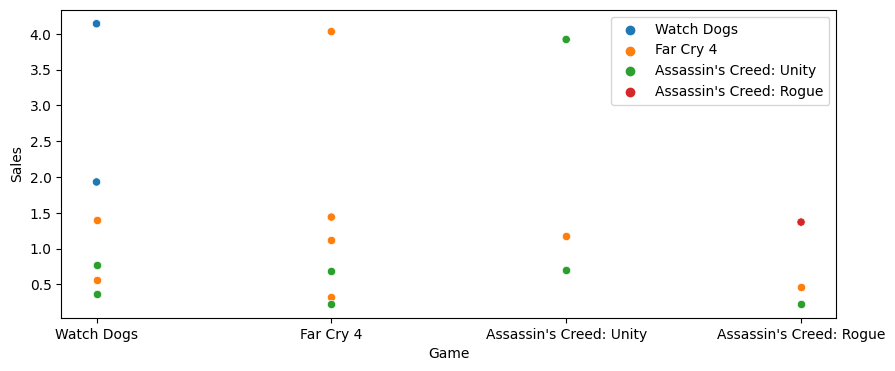

In [199]:
plt.figure(figsize=(10, 4))
sns.scatterplot(Unisoft_Publisher_Max , x = 'Name', y = 'Global_Sales', hue='Name')
sns.scatterplot(Unisoft_Publisher_Max , x = 'Name', y = 'NA_Sales')
sns.scatterplot(Unisoft_Publisher_Max , x = 'Name', y = 'L_Sales')
plt.xlabel('Game')
plt.ylabel('Sales')

## 8. Which game are only in Racing(genre) and Wii(platform)

In [181]:
Gr_Pw = data[(data['Genre'] == 'Racing') & (data['Platform'] == 'Wii')]
Gr_Pw

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3178,3180,Donkey Kong Barrel Blast,Wii,2007.0,Racing,Nintendo,0.20,0.26,0.11,0.06,0.64
3696,3698,Excite Truck,Wii,2006.0,Racing,Nintendo,0.40,0.03,0.08,0.04,0.54


## 9. How many games released by SONY publisher and visualize the global sales by years also differentiate with platforms

In [200]:
Sony_Pub = data[(data['Publisher'] == 'Sony Computer Entertainment')]
Sony_Pub
# There are 148 game released by SONY publisher

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,As_Sales,L_Sales,Global_Sales
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
47,48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
54,55,Gran Turismo 5,PS3,2010.0,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
...,...,...,...,...,...,...,...,...,...,...,...
6218,6220,Patapon 3,PSP,2011.0,Misc,Sony Computer Entertainment,0.05,0.04,0.17,0.02,0.28
6410,6412,Battle Arena Toshinden 3,PS,1996.0,Fighting,Sony Computer Entertainment,0.06,0.04,0.14,0.02,0.27
6698,6700,Penny Racers,PS,1996.0,Racing,Sony Computer Entertainment,0.00,0.00,0.23,0.02,0.25
6751,6753,Jumping Flash! 2,PS,1996.0,Platform,Sony Computer Entertainment,0.05,0.03,0.15,0.02,0.25


Text(0, 0.5, 'Global Sales')

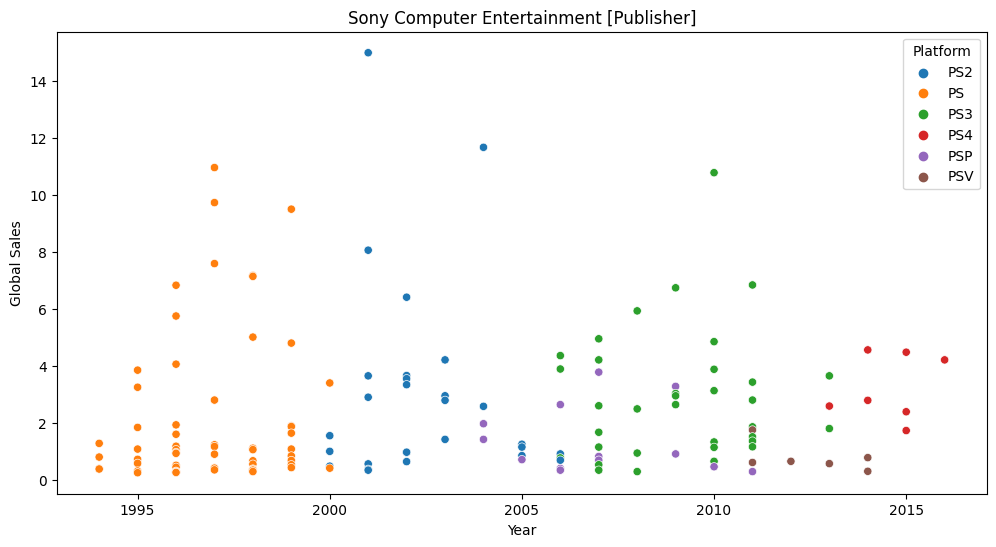

In [183]:
plt.figure(figsize=(12, 6))
sns.scatterplot(Sony_Pub , x = 'Year', y = 'Global_Sales' , hue = 'Platform')
plt.title('Sony Computer Entertainment [Publisher]')
plt.xlabel('Year')
plt.ylabel('Global Sales')

## 10. Show that the which game is globally sales above 30% 

In [207]:
G_30 = data[(data['Global_Sales'] > 30)]

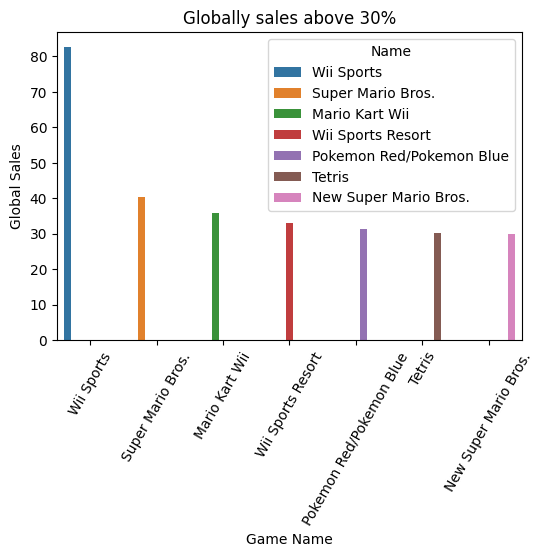

In [216]:
plt.figure(figsize=(6, 4))
sns.barplot(G_30 , x = "Name" , y = 'Global_Sales' , hue = 'Name')
plt.title('Globally sales above 30%')
plt.xlabel('Game Name') 
plt.ylabel('Global Sales')
plt.xticks(rotation=60)
plt.show()

## Conclusion

    The game data analytics project provided valuable insights into the trends and patterns of game releases and sales across different publishers, platforms, genres, and regions. By leveraging these findings, stakeholders in the gaming industry can make informed decisions to enhance game development, marketing, and overall strategy.

#### Objective:
The primary objective of this project was to analyze the data of games released by various publishers across different platforms, years, genres, and regions. The analysis aimed to uncover patterns and trends in global, national, European, Asian, and local sales to provide insights into the gaming industry's landscape and inform future decisions for game development and marketing strategies.
#### Insights from Visualizations:
- *Bar Plot:* Illustrated the distribution of game sales across different genres, platforms, and regions.
- *Pie Plot:* Showed the market share of various publishers, highlighting the most successful ones in terms of sales.
- *Count Plot:* Displayed the frequency of game releases per year, correlating with sales trends.
- *Line Plot:* Tracked sales trends over time, showing growth or decline in specific genres and platforms across different regions.

#### Implications:
The insights are valuable for game developers, publishers, and marketers. Understanding which genres and platforms are popular in different regions can guide future game development projects, ensuring they meet market demand. Recognizing the most influential publishers and their strategies can help new entrants plan their market approach.

#### Recommendations:
1. *Focus on Region-Specific Popular Genres and Platforms:* Tailor game development and marketing strategies to align with the preferences of each region to maximize sales potential.
2. *Leverage Peak Sales Periods:* Align new game launches with peak sales periods identified in the data to capitalize on increased player interest.
3. *Study Successful Publishers:* Analyze the strategies of dominant publishers to understand what contributes to their success and apply similar practices in different regions.

#### Limitations and Future Work:
This analysis was based on available game release and sales data and may not capture all industry dynamics. Future work could involve more granular data, including player demographics, in-game engagement metrics, and reviews. Additionally, considering factors such as marketing campaigns and technological innovations could provide a more comprehensive understanding of the gaming industry's evolution.